<a href="https://colab.research.google.com/github/cosh14/SPR-FDTD/blob/main/SOP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import pi
from scipy.constants import h
from scipy.constants import c
h_bar = 6.5822*10**(-16)
# system setup = prism(substrate)|gold(metal)|air(dielectric)
refr_indices = np.array([0.172+3.421j, 1, 1.515]) #given; formatted as gold|air|prism
e_gold_real = 0.172**2-3.421**2
e_gold_im = 2*0.172*3.421
dielec_const = np.array([e_gold_real+e_gold_im*1j,1,1.515]) #calculated; https://physics.stackexchange.com/questions/397483/converting-a-complex-index-of-refraction-to-a-complex-dielectric-constant
#lsr_wl = 633*10**-9

In [ ]:
def calc(lsr_wl, d_gold, scan_angle_min, scan_angle_max, angle_steps):
  ref = np.zeros(angle_steps)
  a0 = scan_angle_min
  a1 = scan_angle_max
  N = angle_steps
  wl = (lsr_wl*10**-9)
  omega = 2*pi/wl*c
  theta = np.linspace(a0,a1,N)
  for i in range (N):
    theta_usa = (a0+(i-1)/1000*(a1-a0))/180*pi
    t11 = np.cos(theta_usa)/refr_indices[2]
    t12 = np.sqrt(dielec_const[0] - refr_indices[2]**2*np.sin(theta_usa)**2)/dielec_const[0]   
    rpr1 = (t11 - t12)/(t11 + t12)
    t21 = np.sqrt(dielec_const[0]-refr_indices[2]**2*np.sin(theta_usa)**2)/dielec_const[0]
    t22 = np.sqrt(dielec_const[1]-refr_indices[2]**2*np.sin(theta_usa)**2)/dielec_const[1]
    r12 = (t21 - t22)/(t21 + t22)
    aaa = 2*omega/c*d_gold*np.sqrt(dielec_const[0]-refr_indices[2]**2*np.sin(theta_usa)**2)
    alpha = aaa*1j
    rpr12 = (rpr1+r12*np.exp(alpha))/(1+rpr1*r12*np.exp(alpha))
    rpr12c = np.conjugate(rpr12)
    ref[i] = rpr12*rpr12c 
  ymin = ref.min()
  xmin = theta[np.argmin(ref)]
  return ref,xmin,ymin


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


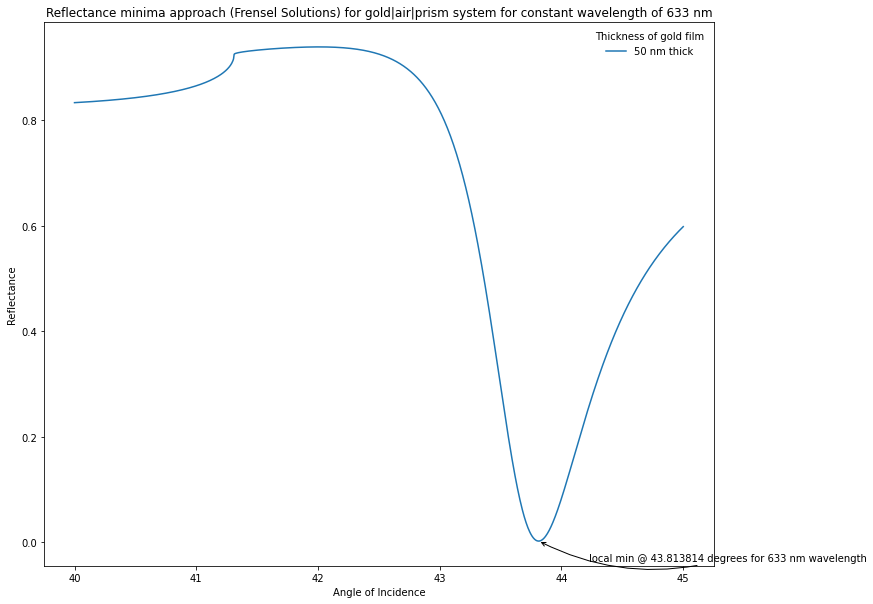

In [ ]:
#for series of plots
#1st is for const wavelength of laser
#2nd is for varying wl but constant thickness of metal
def plot_disp_wl(lsr_wl, min_d, max_d, N_plots, scan_angle_min, scan_angle_max, angle_steps):
  fig, ax = plt.subplots(figsize=(12,10))
  wl = lsr_wl*10**-9
  d_range = np.linspace(min_d,max_d,N_plots)
  theta = np.linspace(scan_angle_min, scan_angle_max, angle_steps)
  for i in range (N_plots):
    ref, xmin, ymin = calc(lsr_wl,d_range[i]*10**-9,scan_angle_min,scan_angle_max,angle_steps)
    ax.plot(theta,ref,label='%d nm thick' %d_range[i])
    ax.annotate('local min @ %f degrees for %d nm wavelength' %(xmin,lsr_wl), xy=(xmin,ymin), xytext=(50, -20), textcoords='offset points',arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=-0.2"))
  plt.xlabel('Angle of Incidence')
  plt.ylabel('Reflectance')
  plt.title('Reflectance minima approach (Frensel Solutions) for gold|air|prism system for constant wavelength of %d nm' %lsr_wl)
  ax.legend(loc='best', frameon=False, title = 'Thickness of gold film')
  plt.show()
  return 

def plot_disp_d(do, min_wl, max_wl, incr, scan_angle_min, scan_angle_max, angle_steps):
  fig, ax = plt.subplots(figsize=(12,10))
  wl_range = np.arange(min_wl,max_wl,incr)
  d = do*10**-9
  theta = np.linspace(scan_angle_min, scan_angle_max, angle_steps)
  for i in range (len(wl_range)):
    ref, xmin, ymin = calc(wl_range[i],d,scan_angle_min,scan_angle_max, angle_steps)
    ax.plot(theta,ref,label='%d nm wavelength' %np.round(wl_range[i],2))
    ax.annotate('local min @ %f degrees for %d nm wavelength' %(xmin,wl_range[i]), xy=(xmin,ymin), xytext=(50, -20), textcoords='offset points',arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=-0.2"))
  plt.xlabel('Angle of Incidence')
  plt.ylabel('Reflectance')
  plt.title('Reflectance minima approach (Frensel Solutions) for gold|air|prism system for constant gold of %d nm thickness' %do)
  ax.legend(loc='best', frameon=False, title = 'Wavelength of incident laser')
  plt.show()
  return 


plot_disp_wl(633,50, 50, 1, 40, 45, 1000)

In [ ]:
#for individual plots
fig, ax = plt.subplots(figsize=(12,10))
ax.plot(theta,calc(639,50*10**-9,35,45, 1000)[0],'-',label='50 nm thick')
ax.plot(theta,calc(639,40*10**-9,35,45, 1000)[0],'--',label='40 nm thick')
plt.xlabel('Angle of Incidence')
plt.ylabel('Reflectance')
plt.title('Reflectance minima approach for gold|air|prism system')
ax.annotate('local min @ %f degrees' %np.round(calc(639,50*10**-9,35,45, 1000)[1],2), xy=(calc(639,50*10**-9,35,45, 1000)[1], calc(639,50*10**-9,35,45, 1000)[2]), xytext=(calc(639,50*10**-9,35,45, 1000)[1]+4, calc(639,50*10**-9,35,45, 1000)[2]),arrowprops=dict(facecolor='black', shrink=0.05),)
ax.annotate('local min @ %f degrees' %np.round(calc(639,40*10**-9,35,45, 1000)[1],2), xy=(calc(639,40*10**-9,35,45, 1000)[1], calc(639,40*10**-9,35,45, 1000)[2]), xytext=(calc(639,40*10**-9,35,45, 1000)[1]+4, calc(639,40*10**-9,35,45, 1000)[2]),arrowprops=dict(facecolor='black', shrink=0.05),)
ax.legend(loc='best', frameon=False, title = 'Thickness of gold film')